In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import sys
import os

# Add src to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from outliers import handle_outliers

# Load data
current_dir = os.getcwd()
base_dir = os.path.abspath(os.path.join(current_dir, '..'))
data_path = os.path.join(base_dir, 'data', 'processed', 'updated_encoded_train.csv')
df = pd.read_csv(data_path)
target_col = 'GrLivArea'  # Example column for outliers

In [2]:
# Flag outliers
df_flagged = handle_outliers(df.copy(), target_col, method='iqr', action='flag')

# Remove outliers
df_removed = handle_outliers(df.copy(), target_col, method='iqr', action='remove')

# Winsorize
df_winsor = handle_outliers(df.copy(), target_col, method='iqr', action='winsorize')  # Note: winsorize not in original func, add if needed

In [4]:
# Summary stats comparison
summ_all = df[target_col].describe()[['mean', '50%', 'std']].rename({'50%': 'median'})
summ_removed = df_removed[target_col].describe()[['mean', '50%', 'std']].rename({'50%': 'median'})
summ_winsor = df_winsor[target_col].describe()[['mean', '50%', 'std']].rename({'50%': 'median'})

comp = pd.DataFrame({
    'All': summ_all,
    'Removed': summ_removed,
    'Winsorized': summ_winsor
})
print(comp)

             All   Removed  Winsorized
mean    0.222582  0.215289    0.219465
median  0.212886  0.210625    0.212886
std     0.098998  0.084764    0.084916


In [5]:
# Regression: SalePrice ~ features
X_all = df.drop('SalePrice', axis=1)
y_all = df['SalePrice']
model_all = LinearRegression().fit(X_all, y_all)
r2_all = model_all.score(X_all, y_all)

X_removed = df_removed.drop('SalePrice', axis=1)
y_removed = df_removed['SalePrice']
model_removed = LinearRegression().fit(X_removed, y_removed)
r2_removed = model_removed.score(X_removed, y_removed)

print(f"R2 All: {r2_all}, R2 Removed: {r2_removed}")

R2 All: 0.8699848508201266, R2 Removed: 0.9143319739967859


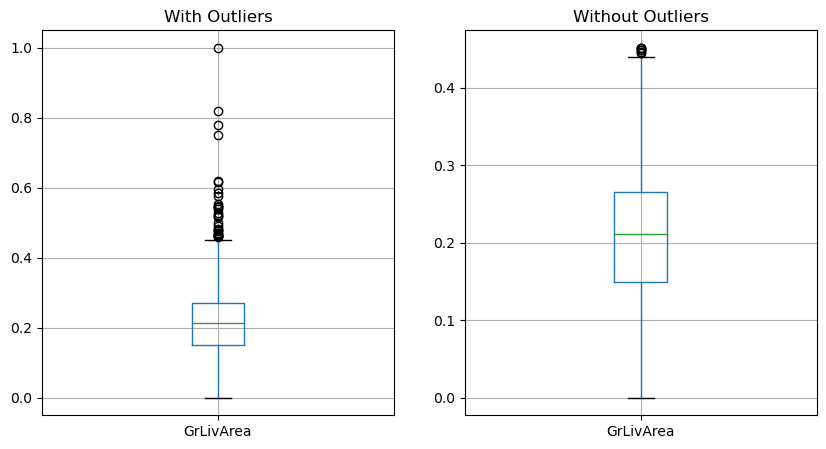

In [6]:
# Boxplot comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df.boxplot(column=target_col)
plt.title('With Outliers')

plt.subplot(1, 2, 2)
df_removed.boxplot(column=target_col)
plt.title('Without Outliers')
plt.show()